In [19]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

import numpy as np
import matplotlib.pylab as plt
import mne
import pandas as pd

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

import sys
sys.path.append('../')
from src import data
!date -I


folder = 'external/nieus_tms_eeg_ebrains/derivatives/epochs/'
subject = 'sub-01'

eeg_epoched_data = np.load(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_run-01_epochs.npy'))
metadata = pd.read_csv(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_run-01_channels.tsv'), sep = '\t')
montage = mne.channels.read_custom_montage(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_electrodes.tsv'))
metadata.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-12-05


,high_cutoff,low_cutoff,name,sampling_frequency,status,type,units
0,NaN,0.1,Fp1,725.0,good,EEG,uV
1,NaN,0.1,Fpz,725.0,good,EEG,uV
2,NaN,0.1,Fp2,725.0,good,EEG,uV
3,NaN,0.1,AF3,725.0,good,EEG,uV
4,NaN,0.1,AFz,725.0,good,EEG,uV


In [17]:
epochs_info = mne.create_info(list(metadata.name), metadata.iloc[0].sampling_frequency)
epochs = mne.EpochsArray(eeg_epoched_data,epochs_info)

Not setting metadata
128 matching events found


No baseline correction applied
0 projection items activated


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_2537/3296598425.py:1: RuntimeWarning: The unit for channel(s) AF3, AF4, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO1, PO2, POz, Pz, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  epochs.set_channel_types({m:'eeg' for m in metadata.name})
/tmp/ipykernel_2537/3296598425.py:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(montage)


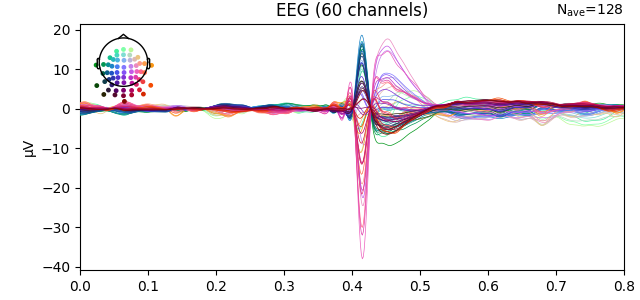

In [18]:
epochs.set_channel_types({m:'eeg' for m in metadata.name})
epochs.set_montage(montage)
epochs.average("all").plot();